In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds/snp_scores.tsv"
atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/dsqtl_preds/snp_scores.tsv"

In [2]:
dsqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
dsqtls_dnase[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_dnase['META_DATA'].str.split(",", expand=True)

dsqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)
dsqtls_atac[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_atac['META_DATA'].str.split(",", expand=True)



In [3]:
dsqtls_atac["label"] = dsqtls_atac["label"].astype(int)
dsqtls_atac["abs_gkm_SVM"] = dsqtls_atac["abs_gkm_SVM"].astype(float)

dsqtls_dnase["label"] = dsqtls_dnase["label"].astype(int)
dsqtls_dnase["abs_gkm_SVM"] = dsqtls_dnase["abs_gkm_SVM"].astype(float)


28308 574


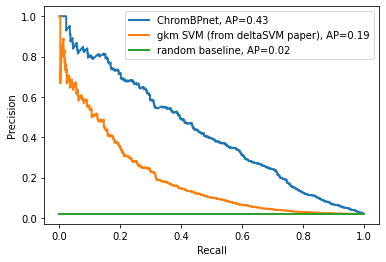

In [5]:
dsqtl=dsqtls_atac

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet, AP="+str(round(roc_auc,2)))

#fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
#roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
#plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet counts, AP="+str(round(roc_auc,2)))

fpr_gkm, tpr_gkm, _ = precision_recall_curve(dsqtl["label"],abs(dsqtl["abs_gkm_SVM"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["abs_gkm_SVM"]))
plt.plot(tpr_gkm, fpr_gkm, linewidth=2, label="gkm SVM (from deltaSVM paper), AP="+str(round(roc_auc,2)))

in1 = list(dsqtl["label"])
random.shuffle(in1)
in1=np.array(in1)

fpr_random, tpr_random, _ = precision_recall_curve(dsqtl["label"], in1)
roc_auc = metrics.average_precision_score(dsqtl["label"], in1)
plt.plot(tpr_random, [sum(dsqtl["label"]==1)/len(dsqtl["label"])]*len(fpr_random), linewidth=2, label="random baseline, AP="+str(round(roc_auc,2)))

print(len(dsqtl["label"]), sum(dsqtl["label"]==1))
plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

#plt.savefig("pr_curve_atac_dsqtls_gm.pdf")
plt.savefig("pr_curve_atac_dsqtls_gm.png")



28308 574


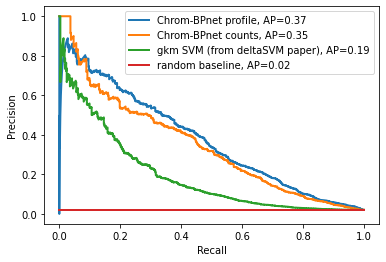

In [5]:
dsqtl= dsqtls_dnase

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet profile, AP="+str(round(roc_auc,2)))

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet counts, AP="+str(round(roc_auc,2)))

fpr_gkm, tpr_gkm, _ = precision_recall_curve(dsqtl["label"],abs(dsqtl["abs_gkm_SVM"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["abs_gkm_SVM"]))
plt.plot(tpr_gkm, fpr_gkm, linewidth=2, label="gkm SVM (from deltaSVM paper), AP="+str(round(roc_auc,2)))

in1 = list(dsqtl["label"])
random.shuffle(in1)
in1=np.array(in1)

fpr_random, tpr_random, _ = precision_recall_curve(dsqtl["label"], in1)
roc_auc = metrics.average_precision_score(dsqtl["label"], in1)
plt.plot(tpr_random, [sum(dsqtl["label"]==1)/len(dsqtl["label"])]*len(fpr_random), linewidth=2, label="random baseline, AP="+str(round(roc_auc,2)))

print(len(dsqtl["label"]), sum(dsqtl["label"]==1))
plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.savefig("pr_curve_dnase_dsqtls_gm.pdf")
